# Programming challenges 

Solutions to the programming challenges. There are multiple ways of solving each so your solution might differ from mine.

## Challenge 1

> Implement the card sorting method in Python.

Start by creating a sequence of number and shuffling it using the `random` module.

In [1]:
import random

In [2]:
cards = [2, 3, 4, 5, 6, 7, 8, 9, 10]
random.shuffle(cards)
print(cards)

[6, 7, 10, 2, 5, 9, 4, 3, 8]


The solution:

In [3]:
for i in range(0, len(cards) - 1):
    for j in range(i + 1, len(cards)):
        if cards[i] > cards[j]:
            # Swap the cards
            cards[i], cards[j] = cards[j], cards[i]
print(cards)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


## Challenge 2

> Compute the area on this satellite image that might correspond with vegetation. 
> Present your results as a percentage of the image. 
> To do that, set a threshold for the NDVI (e.g., 0.3) and count the number of pixels that are greater than the threshold.

Start by loading the Landsat 8 data and calculating the NDVI.

In [4]:
import numpy as np

In [5]:
scene = np.load("kilauea-landsat8.npy")

red = scene[:, :, 3].astype("float32")
nir = scene[:, :, 4].astype("float32")
ndvi = (nir - red) / (nir + red)

Count the number of pixels that fall above the threshold of 0.3. Then divide by the number of pixels in the image and multiply by 100 to get a percentage.

In [6]:
threshold = 0.3

Use two `for` loops and an aggregator pattern.

In [7]:
vegetation_pixels = 0
for row in ndvi:
    for pixel in row:
        if pixel > threshold:
            vegetation_pixels += 1
vegetation_percentage = 100 * vegetation_pixels / ndvi.size
print("Vegetation present in the image (NDVI > 0.3): {:.0f}%".format(vegetation_percentage))

Vegetation present in the image (NDVI > 0.3): 24%


Do the same but with only one loop (using `.ravel()` to collapse the image into a single row).

In [8]:
vegetation_pixels = 0
for pixel in ndvi.ravel():
    if pixel > threshold:
        vegetation_pixels += 1
vegetation_percentage = 100 * vegetation_pixels / ndvi.size
print("Vegetation present in the image (NDVI > 0.3): {:.0f}%".format(vegetation_percentage))

Vegetation present in the image (NDVI > 0.3): 24%


Now with no for loops using `numpy.sum` and numpy's *boolean indexing*.

In [9]:
# Adding boolean values will count the number of "True" values
# Remember that 0 means False and 1 means True.
vegetation_pixels = np.sum(ndvi > threshold)
vegetation_percentage = 100 * vegetation_pixels / ndvi.size
print("Vegetation present in the image (NDVI > 0.3): {:.0f}%".format(vegetation_percentage))

Vegetation present in the image (NDVI > 0.3): 24%


## Challenge 3

> Create, tests, and document (using docstrings) functions that calculate Wien's displacement law and Plank's law from Lecture 1. Each function should operate on a list of of wavelengths. Plank's law should be calculate for a list of wavelengths but a single temperature. Use these functions to reproduce the figures in Part 1 of Lecture 1.

In [10]:
def planks_law(wavelengths, temperature, planks_const=6.626*1e-34, speed_of_light=299792458*1e6, boltzmann_const=1.38*1e-23):
    """
    Calculate the spectral radiance of a black body.
    
    This is Plank's law.
    
    Parameters
    ----------
    wavelengths : list
        List of wavelengths in micrometers.
    temperature : float
        The temperature of black body in K.
    planks_const : float
        Plank's constant in J.s. Optional.
    speed_of_light : float
        The speed of light in a vacumm in micrometers/s. Optional.
    boltzmann_const : float
        The Boltzmann constant in J/K. Optional
        
    Returns
    -------
    spectral_radiance : list
        List of spectral radiance for each wavelength provided in W/micrometer³.
    """
    spectral_radiance = []
    for wavelength in wavelengths:
        # Divide long equations into temporary variables
        exponential = np.exp(planks_const * speed_of_light / (wavelength * boltzmann_const * temperature))
        radiance = 2 * planks_const * speed_of_light**2 / (wavelength**5 * (exponential - 1))
        spectral_radiance.append(radiance)
    return spectral_radiance

I used the optional arguments for the constants so that I can more easily test this function. The trick is giving simple values for the constants to check that our math is correct.

In [11]:
wavelength = [2]
temperature = 3
result = planks_law(wavelength, temperature, planks_const=1, speed_of_light=1, boltzmann_const=1)
expected_result = 1/(2**4 * (np.exp(1 / 6) - 1))
print(result, expected_result)
# To test automatically, use numpy
assert np.allclose(result, expected_result)

[0.34461765394359134] 0.34461765394359134


Now for the other one.

In [12]:
def wiens_law(temperatures, wien_const= 2.897771955*1e3):
    """
    Calculate the peak wavelengths of a black body at the given temperatures.
    
    This is Wien's displacement law.
    
    Parameters
    ----------
    temperatures : list
        The temperatures in K.
    wien_const : float
        Wien's displacement constant in K/micrometer. Optional.
        
    Returns
    -------
    wavelengths : list
        The peak wavelengths in micrometers.
    """
    wavelengths = []
    for temperature in temperatures:
        wavelength = wien_const / temperature
        wavelengths.append(wavelength)
    return wavelengths

In [13]:
temperature = [3, 4, 5]
result = wiens_law(temperature, wien_const=1)
expected_result = np.divide(1, temperature)
print(result, expected_result)
assert np.allclose(result, expected_result)

[0.3333333333333333, 0.25, 0.2] [0.33333333 0.25       0.2       ]


Now to make the plot. We trust that our functions are correct so we can be relatively sure that any mistakes now are in the plotting code. 

First, generate the data.

In [14]:
# Generate 100 points between 10^-1 and 10^3
wavelengths = np.logspace(-1, 3, 100)  # micrometers
temperatures = [200, 300, 500, 1000, 2000, 4000, 6000]  # K

spectral_radiance_profiles = []
for temperature in temperatures:
    # A list of lists. In this case, each list is a profile of radiance vs wavelength
    spectral_radiance_profiles.append(planks_law(wavelengths, temperature))
    
peak_wavelengths = wiens_law(temperatures)
peak_radiances = []
# Calculate the radiance associated with each of these wavelengths
for wavelength, temperature in zip(peak_wavelengths, temperatures):
    radiance = planks_law([wavelength], temperature)
    peak_radiances.append(radiance[0])

/home/leo/miniconda3/envs/envs258/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp


The trick is in getting the plot scale correct. Notice that the scale of the figure in the slide is log in x but y is also the logarithm of spectral radiance.

In [15]:
import matplotlib.pyplot as plt

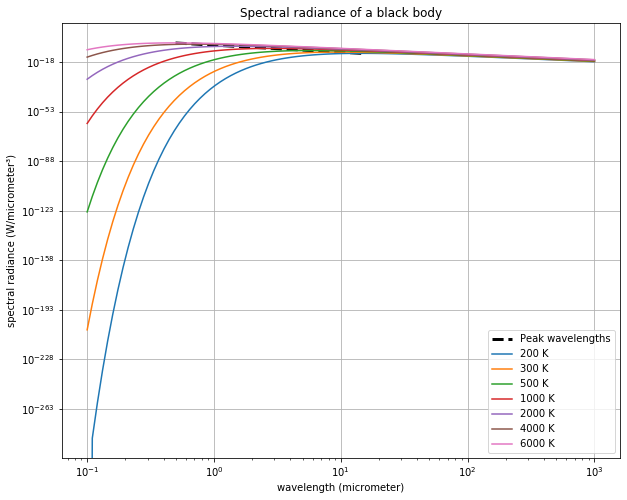

In [16]:
plt.figure(figsize=(10, 8))
plt.title("Spectral radiance of a black body")
plt.plot(peak_wavelengths, peak_radiances, "--k", linewidth=3, label="Peak wavelengths")
for profile, temperature in zip(spectral_radiance_profiles, temperatures):
    plt.plot(wavelengths, profile, "-", label="{} K".format(temperature))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("wavelength (micrometer)")
plt.ylabel("spectral radiance (W/micrometer³)")
# Add the legend with the label of each line
plt.legend()
plt.grid()
plt.show()

Notice that in this figure, all lines go to 0.1 wavelength. In the slides, the lines terminate before 0.1. This is an indicator that figure is cropped in the y-axis. We can replicate this.

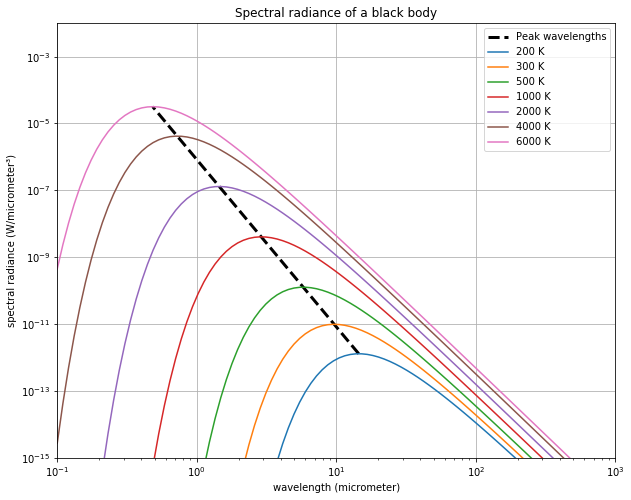

In [17]:
plt.figure(figsize=(10, 8))
plt.title("Spectral radiance of a black body")
plt.plot(peak_wavelengths, peak_radiances, "--k", linewidth=3, label="Peak wavelengths")
for profile, temperature in zip(spectral_radiance_profiles, temperatures):
    plt.plot(wavelengths, profile, "-", label="{} K".format(temperature))
plt.xscale("log")
plt.yscale("log")
# Crop using ylim
plt.ylim(1e-15, 1e-2)
plt.xlim(0.1, 1000)
plt.xlabel("wavelength (micrometer)")
plt.ylabel("spectral radiance (W/micrometer³)")
plt.legend()
plt.grid()
plt.show()

The numbers on the y axis don't match exactly because our units are different. But the overall behaviour is the same.